In [6]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm, ticker
import os
import scipy.constants as sc
from scipy.optimize import newton, bisect
rcParams['figure.figsize'] = (5,2)

In [ ]:
# radius
P = 300
r_in = 0.1 # disc inner radius in au
r_out = 100 # disc outer radius in au
R = np.logspace(np.log10(r_in), np.log10(r_out), P+1)

# height
N = 300
z = np.linspace(0,10,N+1)[:-1]

eps = 1e-4 # minimum height above midplane considered in H

# grain size
M = int(1e3)
a_min = 0.03 / 1e4 # minimum grain size in cm, input in microns
# a_min = 0.9 / 1e4 # minimum grain size in cm, input in microns
a_max = 800 / 1e4 # maximum grain size in cm, input in microns
a = np.logspace(np.log10(a_min), np.log10(a_max), M) # generate grain size list (log dist)

c_s = 1.5 * R**(-0.25) # in km/s
Omega = (np.sqrt(sc.G * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
sdot = 2e-12 * (R/10)**(-1.5) # in g/cm2/s
sd = 30 * (1/R) # in g/cm2
rhos = 3.5 # in g/cm3
H = c_s / (1.5e8) / Omega # in au
H_R = c_s / Omega / (1.5e8) / R
u0 = np.sqrt(2*np.pi) / Omega * sdot / sd
rho0 = sd / np.sqrt(2*np.pi) / (c_s * 1e5) * Omega
k = sdot / rhos / Omega # in cm
scale = rho0 / rho0[-1]

In [174]:
f = lambda z, k, a: k/a * (1 + H_R**2 * z**2) ** (3/2) - z
fdev = lambda z, k, a: k/a * 3 * (1 + (H_R*z)**2 ) ** 0.5 * H_R * z - 1

def fnewton(a, k):
    return newton(f, k/a, args=(k, a), fprime=fdev, maxiter=1000, full_output=True)

def newton_plot(a):
    rf, converge = fnewton(a)[:-1]
    idx = np.sum(converge)-1
    plt.plot(R[:idx], rf[:idx])

In [ ]:
n_a = []
pop_a = []
for i in a:
    try:
        rf = fnewton(i)[0][:-1]
    except RuntimeError:
        pop_a.append(i)
        continue

    idx_term = np.where(np.roll(rf,-1)-rf<0)[0][0]+1 # terminating index
    rf = rf[:idx_term]
    n_ZR = np.zeros((N,P))
    for j in range(len(rf)):
        n_ZR[np.sum(rf[j] > z)-1, j] = i**0.5
    n_a_append = np.reshape(n_ZR, (1, N, P))
    n_a.append(n_a_append)

a_clone = np.array(sorted(set(a) - set(pop_a)))
n_a = np.array(n_a)

print('Minimum grain size:', a_clone[0]*1e4, "microns")
print('Maximum grain size:', a_clone[-1]*1e4, "microns")
print('Number of grains:', len(a_clone))

/tmp/ipykernel_2897554/2159788287.py:5: RuntimeWarning: some failed to converge after 1000 iterations
  return newton(f, k/a, args=(k, a), fprime=fdev, maxiter=1000, full_output=True)


Minimum grain size: 0.08152679500404593 microns
Maximum grain size: 799.9999999999999 microns
Number of grains: 889


In [99]:
np.sum(np.sum(n_a, axis=2)[:,0] == 0, axis=0)

array([  0, 132, 136, 137, 137, 138, 138, 139, 139, 139, 140, 140, 140,
       140, 141, 141, 141, 142, 142, 142, 142, 143, 143, 143, 144, 144,
       144, 144, 145, 145, 145, 145, 146, 146, 146, 147, 147, 147, 147,
       148, 148, 148, 149, 149, 149, 149, 150, 150, 150, 151, 151, 151,
       151, 152, 152, 152, 152, 153, 153, 153, 154, 154, 154, 154, 155,
       155, 155, 156, 156, 156, 156, 157, 157, 157, 158, 158, 158, 158,
       159, 159, 159, 159, 160, 160, 160, 161, 161, 161, 161, 162, 162,
       162, 163, 163, 163, 163, 164, 164, 164, 165, 165, 165, 165, 166,
       166, 166, 166, 167, 167, 167, 168, 168, 168, 168, 169, 169, 169,
       170, 170, 170, 170, 171, 171, 171, 172, 172, 172, 172, 173, 173,
       173, 173, 174, 174, 174, 175, 175, 175, 175, 176, 176, 176, 177,
       177, 177, 177, 178, 178, 178, 179, 179, 179, 179, 180, 180, 180,
       180, 181, 181, 181, 182, 182, 182, 182, 183, 183, 183, 184, 184,
       184, 184, 185, 185, 185, 185, 186, 186, 186, 187, 187, 18

In [135]:
np.sum(n_a, axis=2)[:,0,1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
scale = sd[-1] / np.sum(np.sum(n_a, axis=0)[0], axis=0) * 300

In [80]:
n_a_new = np.copy(n_a)

for i in range(len(a_clone)):
    n_a_new[i,0] *= scale

# np.tile(np.reshape(scale, (300, 1)), 300).T

In [ ]:
density_grid = fits.PrimaryHDU(n_a)
grain_size = fits.ImageHDU(a_clone*1e4)
density_grid.header['read_n_a'] = 0
hdulist = fits.HDUList([density_grid, grain_size])
hdulist.writeto('/data/jhyl3/mcfost_files/run_04/no_wind_density.fits', overwrite=True)

Locator attempting to generate 1583 ticks ([0.0, ..., 31640.0]), which exceeds Locator.MAXTICKS (1000).


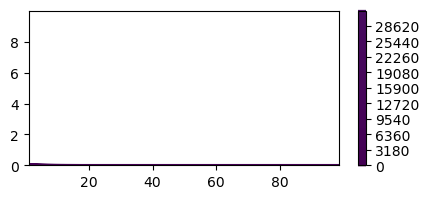

In [155]:
plt.contour(R[:-1], z, n_a[-1,0], levels=2000, vmax=1e6)
plt.colorbar()

In [20]:
scale_new = sd[-1] / np.sum(np.sum(n_a, axis=0)[0], axis=0)

In [21]:
scale_new

array([0.00545489, 0.0055125 , 0.00551478, 0.0055154 , 0.0055154 ,
       0.005516  , 0.005516  , 0.00551662, 0.00551662, 0.00551662,
       0.00551725, 0.00551725, 0.00551725, 0.00551725, 0.00551788,
       0.00551788, 0.00551788, 0.00551852, 0.00551852, 0.00551852,
       0.00551852, 0.00551916, 0.00551916, 0.00551916, 0.0055198 ,
       0.0055198 , 0.0055198 , 0.0055198 , 0.00552045, 0.00552045,
       0.00552045, 0.00552045, 0.0055211 , 0.0055211 , 0.0055211 ,
       0.00552175, 0.00552175, 0.00552175, 0.00552175, 0.00552241,
       0.00552241, 0.00552241, 0.00552307, 0.00552307, 0.00552307,
       0.00552307, 0.00552373, 0.00552373, 0.00552373, 0.0055244 ,
       0.0055244 , 0.0055244 , 0.0055244 , 0.00552507, 0.00552507,
       0.00552507, 0.00552507, 0.00552574, 0.00552574, 0.00552574,
       0.00552642, 0.00552642, 0.00552642, 0.00552642, 0.0055271 ,
       0.0055271 , 0.0055271 , 0.00552778, 0.00552778, 0.00552778,
       0.00552778, 0.00552847, 0.00552847, 0.00552847, 0.00552

In [ ]:
def newton_plot(a):
    rf, converge = fnewton(a)[:-1]
    idx = np.sum(converge)-1
    plt.plot(R[:idx], rf[:idx])

In [180]:
f = lambda z, k, a: k/a * (1 + H_R**2 * z**2) ** (3/2) - z
fdev = lambda z, k, a: k/a * 3 * (1 + (H_R*z)**2 ) ** 0.5 * H_R * z - 1

In [184]:
A = a_clone[80]
# newton(f, k/A, fprime=fdev, args=(k[0],A), maxiter=1000)

def fnewton(a, k):
    return newton(f, k/a, args=(k[0], a), fprime=fdev, maxiter=1000, full_output=True)

4.315722296770684


/tmp/ipykernel_2897554/798205329.py:5: RuntimeWarning: some failed to converge after 3000 iterations
  plt.plot(newton(f, k/A, fprime=fdev, args=(k[0],A), maxiter=3000)-k[0]/A)


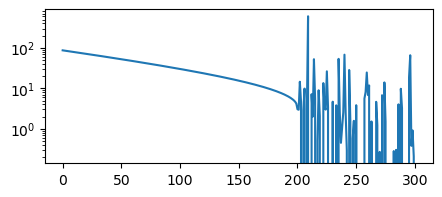

In [216]:
A = a_clone[80]

print(k[0]/A)

plt.plot(newton(f, k/A, fprime=fdev, args=(k[0],A), maxiter=3000)-k[0]/A)
plt.yscale('log')

In [219]:
newton(f, k/A, fprime=fdev, args=(k[0],A), maxiter=3000, full_output=True)[0]

/tmp/ipykernel_2897554/385402097.py:1: RuntimeWarning: some failed to converge after 3000 iterations
  newton(f, k/A, fprime=fdev, args=(k[0],A), maxiter=3000, full_output=True)[0]


array([ 9.11270409e+01,  9.02798190e+01,  8.94399818e+01,  8.86074649e+01,
        8.77822046e+01,  8.69641376e+01,  8.61532012e+01,  8.53493332e+01,
        8.45524720e+01,  8.37625563e+01,  8.29795257e+01,  8.22033200e+01,
        8.14338796e+01,  8.06711454e+01,  7.99150590e+01,  7.91655622e+01,
        7.84225974e+01,  7.76861075e+01,  7.69560360e+01,  7.62323267e+01,
        7.55149239e+01,  7.48037725e+01,  7.40988178e+01,  7.34000055e+01,
        7.27072819e+01,  7.20205935e+01,  7.13398876e+01,  7.06651117e+01,
        6.99962138e+01,  6.93331423e+01,  6.86758461e+01,  6.80242746e+01,
        6.73783775e+01,  6.67381049e+01,  6.61034074e+01,  6.54742361e+01,
        6.48505423e+01,  6.42322779e+01,  6.36193951e+01,  6.30118465e+01,
        6.24095851e+01,  6.18125644e+01,  6.12207381e+01,  6.06340605e+01,
        6.00524861e+01,  5.94759699e+01,  5.89044671e+01,  5.83379336e+01,
        5.77763253e+01,  5.72195987e+01,  5.66677105e+01,  5.61206180e+01,
        5.55782787e+01,  

In [240]:
z_t = 4.42

z_t / (1 + (H_R[0]*z_t)**2)**1.5 - k[0]/A

0.0027025530955926413

In [241]:
from scipy.optimize import bisect

In [ ]:
f = lambda z, k, a: k/a * (1 + H_R**2 * z**2) ** (3/2) - z
fdev = lambda z, k, a: k/a * 3 * (1 + (H_R*z)**2 ) ** 0.5 * H_R * z - 1

In [388]:
%%time

i = 200
print(a[i])
root_list = []
buffer = 3
result = k[0]/a[i]
for j in range(len(H_R)):
    g = lambda z: z / (1 + (H_R[j]*z)**2) ** (3/2) - k[0]/a[i]
    try:
        result = bisect(g, result*0.6, result*1.5, maxiter=2000)
        print(g(result-buffer), g(result*1.5))
    except:
        if g(2**-0.5 / H_R[j]) > 0:
            print('SWITCH')
            print(g(result-buffer), g(2**-0.5 / H_R[j]))
            result = bisect(g, result*0.6, 2**-0.5 / H_R[j], maxiter=2000)
        else:
            continue
    root_list.append(result)

2.3078154740641465e-05
-2.924945289539716 1.83051754864386
-2.924041187119742 1.8289086816600268
-2.9231257593637103 1.8272809229769886
-2.9221988536660786 1.8256340469608472
-2.9212603150967453 1.8239678251752909
-2.9203099863583204 1.8222820263443524
-2.9193477077465917 1.8205764163091618
-2.9183733170944963 1.818850758004389
-2.917386649748748 1.8171048113900423
-2.9163875385037756 1.8153383334371411
-2.915375813561753 1.8135510780771962
-2.914351302485962 1.8117427961583874
-2.9133138301507575 1.8099132354040228
-2.9122632186947124 1.8080621403647217
-2.911199287453921 1.8061892523940126
-2.910121852937853 1.804294309566663
-2.9090307287394515 1.8023770466795788
-2.907925725513988 1.8004371951616078
-2.9068066509020145 1.798474483052947
-2.905673309475116 1.7964886349526146
-2.9045255026782697 1.794479371967713
-2.903363028778594 1.7924464116519316
-2.902185682781109 1.7903894679834065
-2.9009932563870393 1.788308251285509
-2.8997855379223885 1.7862024681827342
-2.8985623122663426 

In [ ]:
g = lambda z, a: z / (1 + (H_R*z)**2) ** (3/2) - k[0]/a

In [393]:
g = lambda a: 2 * 3**-1.5 / H_R - k[0] / a

np.sum(g(a[200])>0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [9]:
%%time
g = lambda a: 2 * 3**-1.5 / H_R - k[0] / a
i = 180
print(a[i])
root_list = []
lower_bound = k[0]/a[i]
solution_check = np.sum(g(a[i])>0)
if solution_check == 0:
    print('no')
for j in range(solution_check):
    g_loc = lambda z: z / (1 + (H_R[j]*z)**2) ** (3/2) - k[0]/a[i]
    result = bisect(g_loc, lower_bound, 2**-0.5 / H_R[j], maxiter=2000)
    lower_bound = result-2
    root_list.append(result)

1.8818850768979675e-05
CPU times: user 32.5 ms, sys: 97 μs, total: 32.6 ms
Wall time: 32.9 ms


In [ ]:
g = lambda a: 2 * 3**-1.5 / H_R - k[0] / a
a_pop = []

root_list = []
lower_bounds = k[0]/a # lower bound for root finding

for i in range(len(a)):
    print(i)
    root_R = []
    lb_loc = lower_bounds[i] # local lower bound at specific grain size
    solution_check = np.sum(g(a[i])>0) # length of grain sizes that have solutions
    if solution_check == 0:
        a_pop.append(a[i])
        continue
    for j in range(solution_check):
        g_loc = lambda z: z / (1 + (H_R[j]*z)**2) ** (3/2) - k[0]/a[i]
        result = bisect(g_loc, lb_loc, 2**-0.5 / H_R[j], maxiter=2000)
        lb_loc = result-2
        root_R.append(result)
    root_R = np.array(root_R)
    root_full_R = np.full((P+1,), np.nan)
    root_full_R[:solution_check] = root_R
    root_list.append(root_full_R)

root_list = np.array(root_list)
a_1 = np.array(sorted(set(a) - set(a_pop)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [105]:
root_list_copy = np.copy(root_list)
root_list_copy[(root_list_copy > 10)] = np.nan
settle_idx = np.sum(np.sum(~np.isnan(root_list_copy), axis=1)==0)
a_2 = np.copy(a_1)[settle_idx:]
root_list_copy = root_list_copy[settle_idx:]

In [104]:
root_list_copy

array([[9.99170179e+00,            nan,            nan, ...,
                   nan,            nan,            nan],
       [9.86202323e+00, 9.87785635e+00, 9.89399532e+00, ...,
                   nan,            nan,            nan],
       [9.73487378e+00, 9.75002899e+00, 9.76547309e+00, ...,
                   nan,            nan,            nan],
       ...,
       [1.15918244e-03, 1.15918244e-03, 1.15918244e-03, ...,
        1.15918249e-03, 1.15918249e-03, 1.15918249e-03],
       [1.14741730e-03, 1.14741730e-03, 1.14741730e-03, ...,
        1.14741735e-03, 1.14741735e-03, 1.14741735e-03],
       [1.13577157e-03, 1.13577157e-03, 1.13577157e-03, ...,
        1.13577162e-03, 1.13577162e-03, 1.13577162e-03]])

In [101]:
for i in range(len(a_2)):
    root_list_copy[i]

880

In [146]:
gs_list = np.sum(np.isnan(root_list_copy), axis=0)[:-1]
scale = []
for k in range(len(gs_list)):
    scale.append(sd[k] / np.sum(a_2[gs_list[k]:]**0.5) * 10)

n_a = []
for i in range(len(a_2)):
    root_list_loc = root_list_copy[i][:-1]
    root_list_loc = root_list_loc[~np.isnan(root_list_loc)]
    n_ZR = np.zeros((N,P))
    for j in range(len(root_list_loc)):
        n_ZR[np.sum(root_list_loc[j] > z)-1, j] = scale[j]
    n_a_append = np.reshape(n_ZR, (1, N, P))
    n_a.append(n_a_append)

n_a = np.array(n_a)

print('Minimum grain size:', a_2[0]*1e4, "microns")
print('Maximum grain size:', a_2[-1]*1e4, "microns")
print('Number of grains:', len(a_2))

Minimum grain size: 0.10203969468724745 microns
Maximum grain size: 799.9999999999999 microns
Number of grains: 880


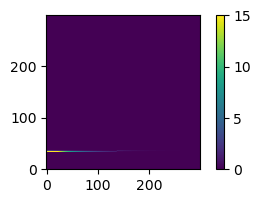

In [155]:
plt.imshow(n_a[200,0], origin='lower', vmax=15)
plt.colorbar()

In [141]:
len(scale)

300

In [119]:
root_list_copy

array([[9.99170179e+00,            nan,            nan, ...,
                   nan,            nan,            nan],
       [9.86202323e+00, 9.87785635e+00, 9.89399532e+00, ...,
                   nan,            nan,            nan],
       [9.73487378e+00, 9.75002899e+00, 9.76547309e+00, ...,
                   nan,            nan,            nan],
       ...,
       [1.15918244e-03, 1.15918244e-03, 1.15918244e-03, ...,
        1.15918249e-03, 1.15918249e-03, 1.15918249e-03],
       [1.14741730e-03, 1.14741730e-03, 1.14741730e-03, ...,
        1.14741735e-03, 1.14741735e-03, 1.14741735e-03],
       [1.13577157e-03, 1.13577157e-03, 1.13577157e-03, ...,
        1.13577162e-03, 1.13577162e-03, 1.13577162e-03]])

In [137]:
gs_list = np.sum(np.isnan(root_list_copy), axis=0)[:-1]
scale = []
for i in range(len(gs_list)):
    scale.append(sd[i] / np.sum(a_2[gs_list[i]:]**0.5) * 10)
    # scale.append(sd[:-1]/np.sum(a_2[i:]**0.5)*10)

In [138]:
scale

[54.576436624016786,
 53.3372248080213,
 52.12312134488605,
 50.93665425061894,
 49.777194444661845,
 48.64412716607835,
 47.53685164759947,
 46.454780797088745,
 45.397340886258384,
 44.36656282706639,
 43.356656560483735,
 42.369738567102644,
 41.40528556993962,
 40.46278620324952,
 39.54174074139267,
 38.64166083387373,
 37.764286578738215,
 36.90466646758495,
 36.06461369908382,
 35.24368286613753,
 34.441438700352165,
 33.65745584125206,
 32.89325993071259,
 32.1445179228667,
 31.412819363906493,
 30.697776297570854,
 29.999009598561294,
 29.316148771524734,
 28.65053142112336,
 27.998365704885725,
 27.361045092747005,
 26.738231668882698,
 26.129595209371583,
 25.534813007106543,
 24.955057795426413,
 24.38701132879414,
 23.83189517836867,
 23.289415014219177,
 22.75928320618208,
 22.241218671355625,
 21.736249584944325,
 21.241472138392883,
 20.757957201533344,
 20.285448408346106,
 19.823695228414618,
 19.373620087386353,
 18.93262265405111,
 18.50166354784993,
 18.080514268560

0.4073821436330385
0.4073821436330385
0.4073821436330385


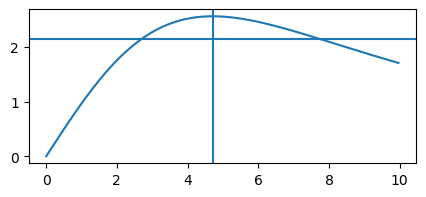

In [79]:
i=180
rad_idx = 290
plt.plot(z, z/(1 + (H_R[rad_idx]*z)**2)**1.5)
plt.axhline(k[0]/a_1[i])
z_max = 2**-0.5 / H_R[rad_idx]
plt.axvline(z_max)
print(z_max/(1+(H_R[rad_idx]*z_max)**2)**1.5-k[0]/a_1[i])
print(z_max / (1 + H_R[rad_idx]**2 * z_max**2) ** (3/2) - k[0]/a_1[i])
print(z_max / (1 + (H_R[rad_idx]*z_max)**2) ** (3/2) - k[0]/a_1[i])

/tmp/ipykernel_3159504/1231712966.py:4: RuntimeWarning: RMS of 5.88331e+32 reached
  return newton(f, k/a, args=(k, a), maxiter=1000, full_output=True)


ValueError: x and y must have same first dimension, but have shapes (301,) and (921, 301)

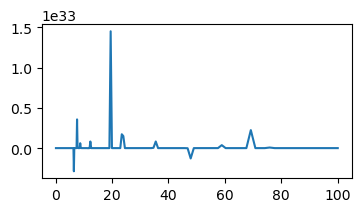

In [83]:
rcParams['figure.figsize'] = (4,2)
f = lambda z, k, a: z / (1 + H_R**2 * z**2) ** (3/2) - k/a
def fnewton(a, k):
    return newton(f, k/a, args=(k, a), maxiter=1000, full_output=True)
plt.plot(R, fnewton(a[i], k)[0])
plt.plot(R[:len(root_list)], root_list, c='green', lw=0.8, ls=':')
plt.axhline(k[0]/a[i], lw=0.8, c='gray', ls='--')
plt.ylim(0,10)

In [286]:
print(f(k[0]/a[i]-buffer), f(k[0]/a[i]+buffer))

3.3597475790813682 -1.4841475514020281


In [287]:
bisect(f, k[0]/a[i]+buffer, k[0]/a[i]-buffer, maxiter=2000)

9.862023227274296

/tmp/ipykernel_2897554/183945850.py:5: RuntimeWarning: some failed to converge after 1000 iterations
  return newton(f, k/a, args=(k[0], a), fprime=fdev, maxiter=1000, full_output=True)


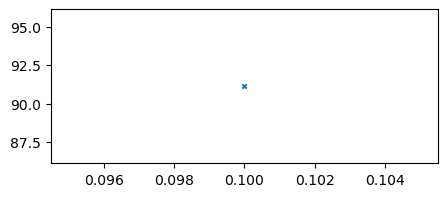

In [186]:
b = np.where((np.roll(fnewton(A,k)[0],-1)-fnewton(A,k)[0])<0)[0][0]+1
idx = b
plt.scatter(R[:idx], fnewton(A,k)[0][:idx], marker='x', s=10)

/tmp/ipykernel_1753397/1758190053.py:7: RuntimeWarning: some failed to converge after 1000 iterations
  return newton(f, k/a, args=(k, a), fprime=fdev, maxiter=1000, full_output=True)


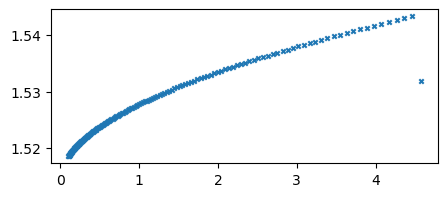

In [51]:
# newton_plot(1e-1)
# newton_plot(6e-5)
idx = b+1
plt.scatter(R[:idx], fnewton(A)[0][:idx], marker='x', s=10)
# plt.ylim(0,2)

In [1]:
A = 1e-3

rf, converge = fnewton(A)[:-1]

idx = np.sum(converge)-1
plt.scatter(R[:idx], rf[:idx], s=3, marker='x')

NameError: name 'fnewton' is not defined

#### Old shit

In [12]:
a_limits = k * ( 1 + (H_R * eps)**2 )**(1.5) / eps
a_limits = np.reshape(a_limits, (1,len(a_limits)))
for i in z[1:]:
    a_lim_append = k * ( 1 + (H_R * i)**2 )**(1.5) / i
    a_limits = np.vstack((a_limits, np.reshape(a_lim_append, (1,len(a_lim_append)))))

s=0
for i in np.argmin(a_limits, axis=0):
    a_limits[i+1:,s] =  1e30 # fill value
    s+=1
del s

In [ ]:
# start with one grain size and then generate Z/R grid
n_a = []

for j in a:
    a_loc = j
    q = ~(a_loc < a_limits)
    r = np.sum(q, axis=0)

    n_ZR = np.zeros((N,P))
    if np.sum(r)>0:
        for i in np.where(r!=0)[0][:-1]:
            n_ZR[N-r[i],i] = scale[i]

    n_a_append = np.reshape(n_ZR, (1, N, P))
    n_a.append(n_a_append)

min_idx = np.sum(a < np.min(a_limits))+1
n_a = np.array(n_a)[min_idx+1:]

In [14]:
a[min_idx]

1.0210922725478933e-05

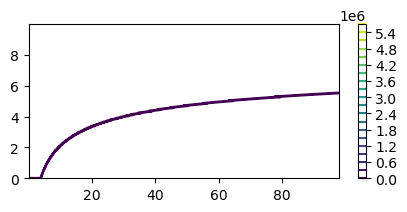

In [86]:
plt.contour(R[:-1], z[:-1], n_a[-1,0], levels=20)
plt.colorbar()

In [85]:
density_grid = fits.PrimaryHDU(n_a)
grain_size = fits.ImageHDU(a[min_idx+1:])
density_grid.header['read_n_a'] = 0
hdulist = fits.HDUList([density_grid, grain_size])
hdulist.writeto('/data/jhyl3/mcfost_files/no_wind_0.1/no_wind_density.fits', overwrite=True)